In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [24]:
# sum of null values with respect to columns
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [7]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [9]:
# shape of the dataframe
df.shape

(2227, 3)

In [23]:
# droping the null values because they are very less in the data 
df.dropna(inplace=True)

In [25]:
# Here the ratio of '0' and '1' are constant
df['y'].value_counts()

0    1238
1     981
Name: y, dtype: int64

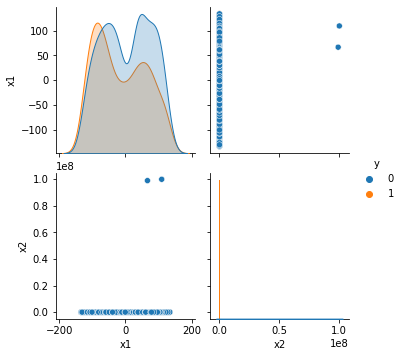

In [26]:
# pairplot with respect to the target
sns.pairplot(df, hue='y')

<function matplotlib.pyplot.legend(*args, **kwargs)>

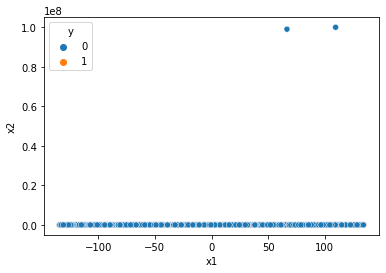

In [94]:
# Scatterplot by standardizing the given data with respect to target
sns.scatterplot(x='x1',y='x2',hue='y',data=df)
plt.legend

In [27]:
y=df['y']
x = df.drop('y',axis=1)

In [28]:
x.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [29]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(2219, 2)


In [30]:
# Application of train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(standardized_data,y,test_size = 0.25,random_state = 0)

In [31]:
x_train

array([[-0.96636111, -0.03001869],
       [ 0.7795528 , -0.03001092],
       [-1.29616054, -0.02999486],
       ...,
       [-0.62191638, -0.03001695],
       [-0.86856537, -0.03002607],
       [-1.08907278, -0.03007053]])

### Logistic Regression

In [32]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [69]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
# tuning the logistic Regression with 'C' and 'penalty'
# Applicatin of Grid Search CV

tuned_parameters = [{'C':[1,10,100], 'penalty':['l1','l2']}]

eval=['accuracy','precision','recall']
for i in eval:
    clf = GridSearchCV(
    LogisticRegression(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(x_train, y_train)

    print("Best parameters set found on train set:")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(x_test, y_test))

Best parameters set found on train set:
for accuracy
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1)
0.6018018018018018
Best parameters set found on train set:
for precision
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1)
0.6160714285714286
Best parameters set found on train set:
for recall
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1)
0.2793522267206478


In [80]:
# Application of RandomizedSearchCV

tuned_parameters = [{'C':[1, 2, 3, 4, 5], 'penalty':['l1','l2']}]

classifier = RandomizedSearchCV(
    LogisticRegression(), tuned_parameters, scoring='accuracy'
)

clf.fit(x_train, y_train)

print("Best parameters on train set:")
print(classifier.best_params_)
print(classifier.best_estimator_)
print()

print(classifier.score(x_test, y_test))

Best parameters set found on train set:
{'penalty': 'l2', 'C': 1}
LogisticRegression(C=1)

0.6018018018018018


In [33]:
y_pred = classifier.predict(x_test)

In [34]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6018018018018018

### Decision Tree

In [143]:
# Decision Tree creating the model and fitting

from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(max_depth = 6)
classifier1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [144]:
y_pred = classifier1.predict(x_test)

In [145]:
# Calculating accuracy

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9477477477477477

In [75]:
# Confusion matrix shows the errors that are happened

conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat

array([[290,  18],
       [ 13, 234]], dtype=int64)

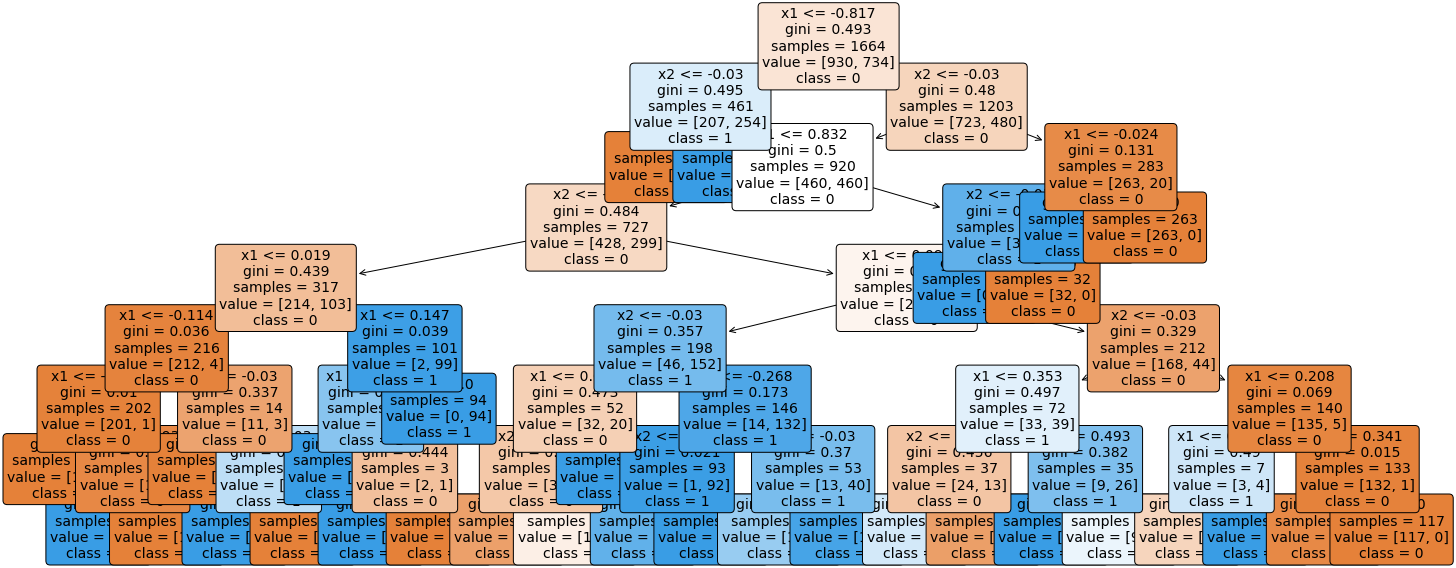

In [114]:
# Ploting a decision tree from the model

from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(classifier1, feature_names = x.columns,class_names = ['0','1'],filled = True,rounded = True,fontsize = 14)

In [141]:
# Calculating the Error rate which shows the best max_depth value 

error_rate=[]
for i in range(1,21):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(x_train,y_train)
    prd_i=dt.predict(x_test)
    error_rate.append(np.mean(prd_i != y_test))

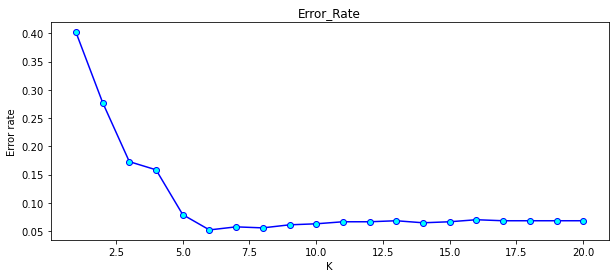

In [142]:
plt.figure(figsize=(10,4))
plt.plot(range(1,21) ,error_rate, color='blue', marker='o',markerfacecolor='aqua')
plt.title('Error_Rate')
plt.xlabel('K')
plt.ylabel('Error rate');

- Here we can observe the max_depth was observed around 6 and gives the best accuracy

- Calculating the ROC curve

In [147]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score

In [148]:
prediction_train=classifier1.predict(x_train)
prediction_test=classifier1.predict(x_test)
FPR,TPR,_=roc_curve(y_train,prediction_train)
FPR1,TPR1,_1=roc_curve(y_test,prediction_test)

In [149]:
roc_auc=auc(FPR,TPR)
print('ROC AUC: %0.3f' % roc_auc)

roc_auc1=auc(FPR1,TPR1)
print('ROC AUC: %0.3f' % roc_auc1)

ROC AUC: 0.954
ROC AUC: 0.949


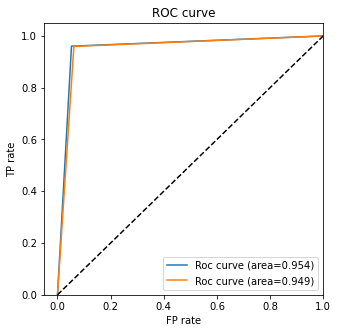

In [152]:
plt.figure(figsize=(5,5))
plt.plot(FPR,TPR,label='Roc curve (area=%0.3f)'% roc_auc)
plt.plot(FPR1,TPR1,label='Roc curve (area=%0.3f)'% roc_auc1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### KNN

In [41]:
# KNN - K Nearest Neighbours creating the model and making fit

from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier()
classifier2.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = classifier2.predict(x_test)

In [43]:
# Calculating accuracy

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.527927927927928

In [ ]:
# performing grid search cv to the list of k values

from sklearn.model_selection import StratifiedKFold, GridSearchCV

parametre_grid={'n_neighbors':list(np.arange(1,21))}
knn_cv=KNeighborsClassifier()             


In [ ]:
# cv=None , to use the default is 3

classifier=GridSearchCV(knn_cv,parametre_grid,cv=5)
classifier.fit(x_train,y_train)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

In [132]:
# Here we are calculating error_rate to know the best k-value
error_rate=[]
for i in range(1,21):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    prd_i=knn1.predict(x_test)
    error_rate.append(np.mean(prd_i != y_test))

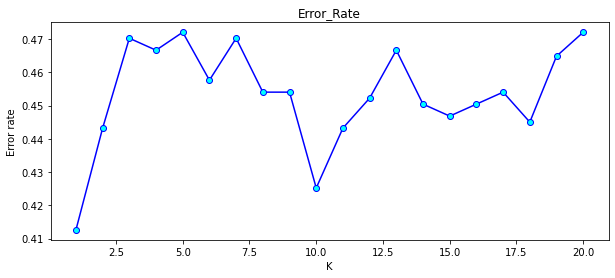

In [133]:
plt.figure(figsize=(10,4))
plt.plot(range(1,21) ,error_rate, color='blue', marker='o',markerfacecolor='aqua')
plt.title('Error_Rate')
plt.xlabel('K')
plt.ylabel('Error rate');

- Here the best k-value is around 1

### SVM

In [65]:
from sklearn.svm import SVC
classifier3 = SVC()
classifier3.fit(x_train, y_train)

SVC()

In [66]:
y_pred = classifier3.predict(x_test)

In [67]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6018018018018018

- SVM with kernel = 'linear'

In [87]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear',C=1)
classifier3.fit(x_train, y_train)

SVC(C=4, kernel='linear')

In [88]:
y_pred = classifier3.predict(x_test)

In [89]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.554954954954955

- SVM with kernel = 'rbf'

In [90]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf',C=1)
classifier3.fit(x_train, y_train)

SVC(C=1)

In [91]:
y_pred = classifier3.predict(x_test)

In [92]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6018018018018018

In [98]:
# Application of the parameters c , gamma and kernels with in the grid search cv

params_dict={'C':[0.001,0.01,0.1,1,10,100],
            'gamma':[0.001,0.01,0.1,1,10,100],
            'kernel':['linear','rbf']}
classifier4=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=5)

classifier4

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [101]:
classifier4.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [102]:
y_pred = classifier4.predict(x_test)

In [103]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6018018018018018

### Objective

- Therefore here we got the best accuracy with Decision tree of 'max_depth=6'

- We observed that the Logistic and SVM are making similar accuracy

- And SVM with kernel 'rbf' was best when compared to the 'linear' from the given data

- SVM classifies the data using the separate vectors and makes a best line where, decision tree makes a great impact over the SVM due to the max_depths

- Here KNN does not perform well due to the neigbor classes will not perform great in the case of this data 

- By this the best algorithm here noticed are in the sequence of Decisio tree, SVM , logistic , KNN

- Decision tree separates the data one to the smaller regions and best fits to the given data

- So by comparing with the every algorithm here we noticed that by the distribution of data "Decision Tree" was the best.
